**Topic**: Analysing the largest revenue generators in the United States.

For the analysis, first, we import the required files.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
from bs4 import BeautifulSoup
import requests

Reading the contents of the webpage to be scraped using BeautifulSoup.

In [47]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
print (soup)

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-disabled vector-feature-client-preferences-disabled" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest companies in the United States by revenue - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vect

Scraping a table from the above the given url using find_all() function. Since the webpage has more than one table so the position of the table to be scraped is also reuired to be mentioned. The headrers in the table are also displayed verifying the table we need.

In [48]:
table = soup.find_all('table')[1]
#Extracting headers of the particular table
headers = table.find_all('th')
headers

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

Now, we are extracting the titles for the table.

In [49]:
table_titles = [title.text.strip() for title in headers]
#Displying titles
print(table_titles)


['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


Using pandas, a DataFrame has been created where we will feed the data in terms of rows and columns where columns heading would be the same as the titles extacted above.

In [50]:
df = pd.DataFrame(columns = table_titles)
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


Scraping the rows of the table in order to scrape the column data to be appended in the DataFrame 'df' using find_all() function.

In [51]:
column_data = table.find_all('tr')
#column_data

Extracting the data of the column in the individual row using for loop on column_data and finding the data in the individual row is added to the DataFrame rowwise.

In [52]:
for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    #Assinging length of DataFrame which is here 0 to a length variable
    length = len(df)
    #length of DataFrame will change with the addition of data.
    df.loc[length] = individual_row_data

In [53]:
#Displaying DataFrame
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and Cloud Computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,Exxon Mobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,"46,298",10.6%,"71,100","Richfield, Minnesota"
96,97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5%,"34,300","New York City, New York"
97,98,United Airlines,Airline,"44,955",82.5%,"92,795","Chicago, Illinois"
98,99,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.5%,"130,000","Waltham, Massachusetts"


Dataframe contains 100 rows and 7 columns. So, extracting top 15 rows using head() function for analysis.

In [54]:
df1 = df.head(15)
df1

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and Cloud Computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,Exxon Mobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
5,6,CVS Health,Healthcare,"322,467",10.4%,"259,500","Woonsocket, Rhode Island"
6,7,Berkshire Hathaway,Conglomerate,"302,089",9.4%,"383,000","Omaha, Nebraska"
7,8,Alphabet,Technology,"282,836",9.8%,"156,000","Mountain View, California"
8,9,McKesson Corporation,Health,"276,711",4.8%,"48,500","Irving, Texas"
9,10,Chevron Corporation,Petroleum industry,"246,252",51.6%,"43,846","San Ramon, California"


Now, visualizing the revenue(USD millions) of different companies of United States using matplotlib.pyplot file.

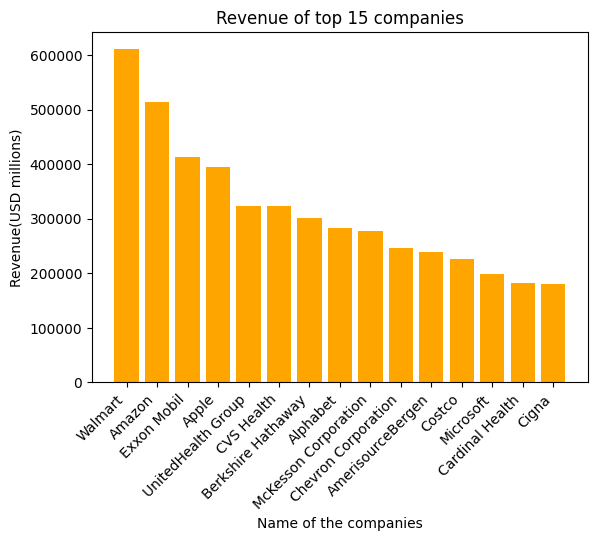

In [55]:
fig, ax = plt.subplots()
plt.bar(df1['Name'], df1['Revenue (USD millions)'].str.replace(',', '').astype(int), color = 'orange')
plt.xlabel('Name of the companies')
plt.ylabel('Revenue(USD millions)')
plt.title('Revenue of top 15 companies')
plt.setp( ax.xaxis.get_majorticklabels(), rotation=45, ha="right" )
plt.gcf().subplots_adjust(bottom=0.15)
plt.show()

Another kind of visualisation form is used to display the revenue growth of top 20 companies by converting datatype of Column 'Renevue growth' from string to float.

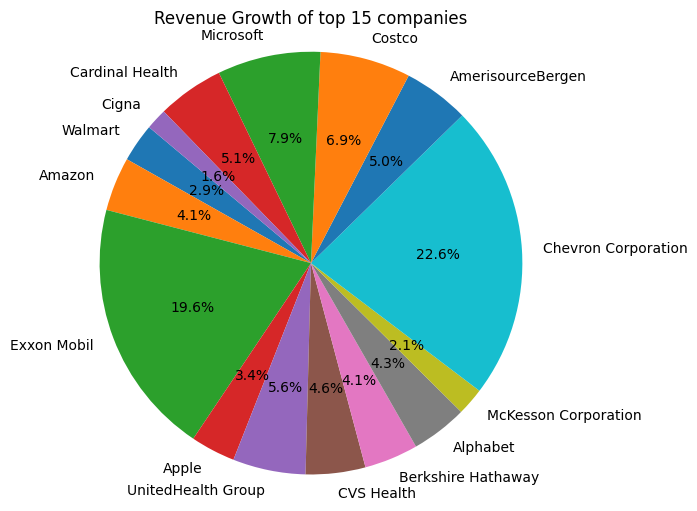

In [56]:
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(df1['Revenue growth'].str.split('%').str[0].astype(float), labels = df1['Name'], autopct='%1.1f%%', startangle=140)
plt.title('Revenue Growth of top 15 companies')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Another Dataframe is craeted with the sorted 'Employees' column. For that firstly, we will convert the datatype of 'Employees' column from string to integer in 'df' DataFrame and, then sorting is applied on the 'Employees' column. The final result which is DataFrame with sorted 'Employess' column is assigned to a new DataFrame 'df2'.

In [57]:
df2 = {}
df['Employees'] = df['Employees'].str.replace(',', '').astype(int)
df2 = df.sort_values(by='Employees', ascending= False)

Resetting the index of the new DataFrame 'df2'.

In [58]:
df2.reset_index()


,index,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,0,1,Walmart,Retail,"611,289",6.7%,2100000,"Bentonville, Arkansas"
1,1,2,Amazon,Retail and Cloud Computing,"513,983",9.4%,1540000,"Seattle, Washington"
2,51,52,United States Postal Service,Logistics,"78,620",2.0%,576000,"Washington, D.C."
3,40,41,FedEx,Transportation,"93,512",11.4%,518249,"Memphis, Tennessee"
4,19,20,The Home Depot,Retail,"157,403",4.1%,471600,"Atlanta, Georgia"
...,...,...,...,...,...,...,...,...
95,73,74,Enterprise Products,Petroleum industry,"58,186",42.6%,7300,"Houston, Texas"
96,71,72,World Fuel Services,Petroleum industry and Logistics,"59,043",88.4%,5214,"Miami, Florida"
97,75,76,Plains All American Pipeline,Petroleum industry,"57,342",36.3%,4100,"Houston, Texas"
98,93,94,PBF Energy,Petroleum industry,"46,830",71.8%,3616,"Parsippany–Troy Hills, New Jersey"


Now, we will find the average revenue industriwise. For this, DataFrame.groupby() function is used to group the identical industry and their average revenue is computed in the next column using mean() function. Also, the datatype of the column 'Revenue (USD millions)'is changed to float to compute the average.

In [63]:
df['Revenue (USD millions)'] = df['Revenue (USD millions)'].str.replace(',', '').astype(float)

In [70]:
df3 = df.groupby('Industry', as_index=False) ['Revenue (USD millions)'].mean()
df3.rename(columns = {'Revenue (USD millions)':'Average revenue_companies'}, inplace = True)
df3

,Industry,Average revenue_companies
0,Aerospace and Defense,65984.000000
1,Aerospace and defense,66608.000000
2,Agriculture cooperative,47194.000000
3,Agriculture manufacturing,52577.000000
4,Airline,48169.333333
5,Apparel,46710.000000
6,Automotive,156735.000000
7,Automotive and Energy,81462.000000
8,Automotive industry,158057.000000
9,Beverage,86859.000000


The visualisation of average revenue of top 15 companies grouped by industry is observed through bar plot.

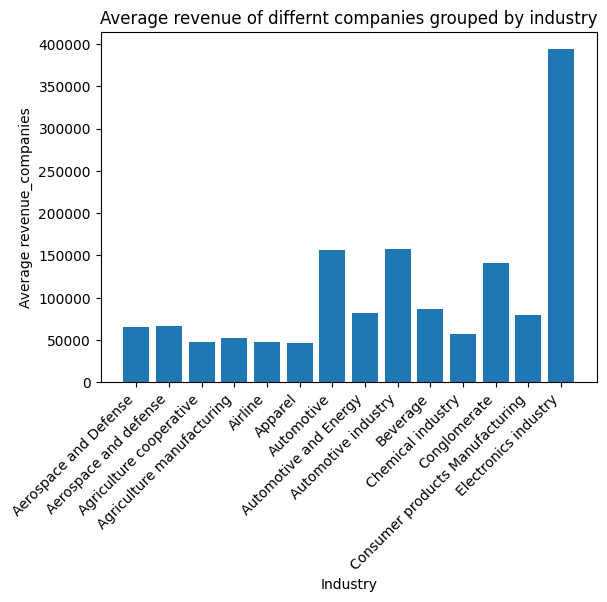

In [79]:
#Visualising the average revnue of top 15 companies.
fig, ax = plt.subplots()
plt.bar(df3['Industry'][:14], df3['Average revenue_companies'][:14])
plt.xlabel('Industry')
plt.ylabel('Average revenue_companies')
plt.title('Average revenue of differnt companies grouped by industry')
plt.setp( ax.xaxis.get_majorticklabels(), rotation=45, ha="right" )
plt.gcf().subplots_adjust(bottom=0.15)
plt.show()

Visualization in terms of tables and figures can be highly beneficial for data analysis, but it depends on the specific context and the goals of your analysis. Tables and figures can effectively summarize large amounts of data, making it easier to spot trends, patterns, and outliers. Charts and graphs can often convey complex information more quickly and intuitively than tables of raw data. Visualizations help you identify patterns, correlations, and relationships in your data that might not be immediately apparent when looking at raw numbers. Here, the revenue in terms of milloin USD and its percentage growth by different largest companies in the United States is analysed and visualised using Pandas, BeautifulSoup. We also scraped the data about which company provide more employments.
